In [1]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE, BOX_SIZE = 100, 20

In [3]:
def get_square_img(img_size=IMG_SIZE, box_size=BOX_SIZE):
    _square_img = np.zeros(shape=(img_size, img_size), dtype=float)
    _ref_box_i = int(img_size/2 - box_size/2)
    _ref_box_j = _ref_box_i
    for i in range(box_size):
        for j in range(box_size):
            _square_img[_ref_box_i + i, _ref_box_j +j] = 1.0
    return _square_img

def ft_img(_img):
    _fft_img = np.fft.fft2(_img)
    return np.fft.fftshift(np.abs(_fft_img))

In [4]:
square_img = get_square_img()
fft_sq_img = ft_img(square_img)

Text(0.5, 1.0, 'FT of square img')

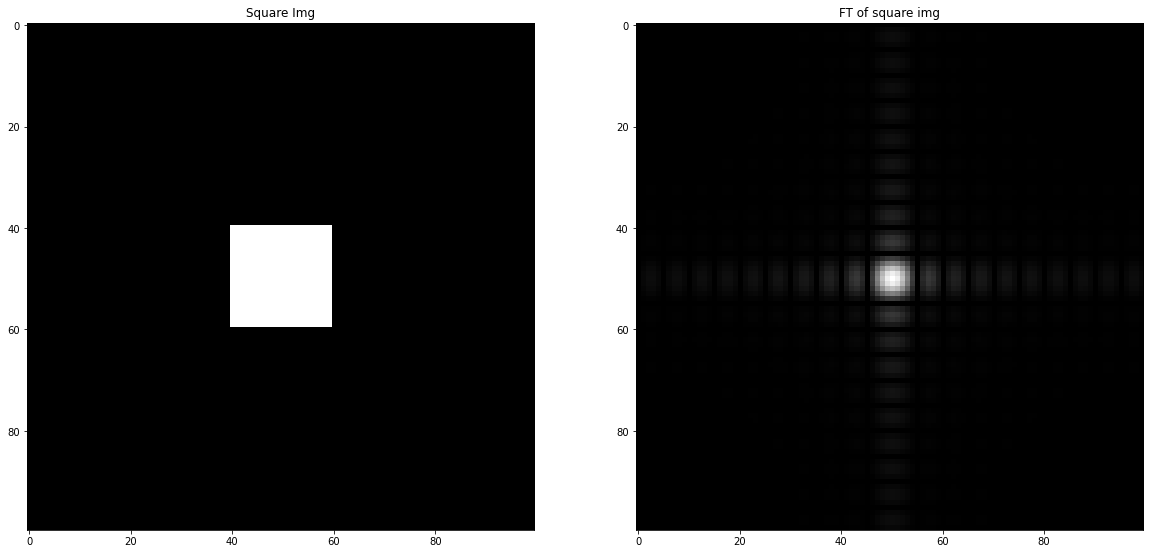

In [5]:
fig, axarr = plt.subplots(1,2, figsize = (20,10))
axarr[0].imshow(square_img, cmap = 'gray')
axarr[0].set_title("Square Img")
axarr[1].imshow(fft_sq_img, cmap = 'gray')
axarr[1].set_title("FT of square img")

In [6]:
def get_plane_wave_img(img_size=IMG_SIZE, _T: float = 1.0, dx: float = 0.1):
    def plane_wave(_r, a=1, f=1/_T):
        return a*math.cos(2.0 * math.pi * f * _r)
    _img = np.zeros(shape=(img_size, img_size), dtype=float)
    _hw = int(img_size/2)
    _ref_box_i = _hw
    _ref_box_j = _ref_box_i
    for i in range(_hw):
        for j in range(_hw):
            r = math.sqrt((dx*i)**2 + (dx*j)**2)
            wave_val = plane_wave(r)
            _img[_ref_box_i+i, _ref_box_i+j] = wave_val
            _img[_ref_box_i-i, _ref_box_i+j] = wave_val
            _img[_ref_box_i+i, _ref_box_i-j] = wave_val
            _img[_ref_box_i-i, _ref_box_i-j] = wave_val
    return _img

In [7]:
wave_img = get_plane_wave_img(512)
fft_wave_img = ft_img(wave_img)

Text(0.5, 1.0, 'FT of square img')

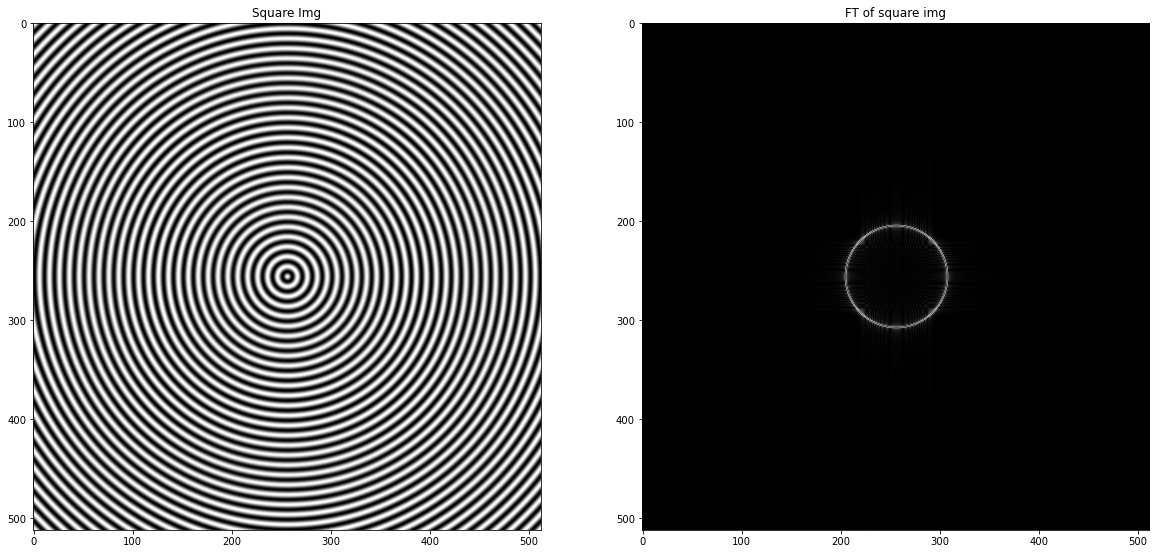

In [8]:
fig, axarr = plt.subplots(1,2, figsize = (20,10))
axarr[0].imshow(wave_img, cmap = 'gray')
axarr[0].set_title("Square Img")
axarr[1].imshow(fft_wave_img, cmap = 'gray')
axarr[1].set_title("FT of square img")
## have to be rescale both img not pixel index

# Low-pass Filter

In [9]:
IMG_SIZE = 256

In [41]:
def get_gaus_img(img_size=IMG_SIZE, _sigma=0.01, dx: float = 0.1):
    def gaus(_r, __sigma=_sigma, mean=0.0):
        return math.exp(-_r**2.0/__sigma)
    _img = np.zeros(shape=(img_size, img_size), dtype=float)
    _hw = int(img_size/2)
    _ref_box_i = _hw
    _ref_box_j = _ref_box_i
    for i in range(_hw):
        for j in range(_hw):
            r = math.sqrt((dx*i)**2 + (dx*j)**2)
            wave_val = gaus(r)
            _img[_ref_box_i+i, _ref_box_i+j] = wave_val
            _img[_ref_box_i-i, _ref_box_i+j] = wave_val
            _img[_ref_box_i+i, _ref_box_i-j] = wave_val
            _img[_ref_box_i-i, _ref_box_i-j] = wave_val
    return _img 

In [42]:
img = cv2.imread('livingthing.png', 0)
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
print(img.shape)

(256, 256)


In [43]:
gaus_img = get_gaus_img()

Text(0.5, 1.0, 'FT Gaussian filter')

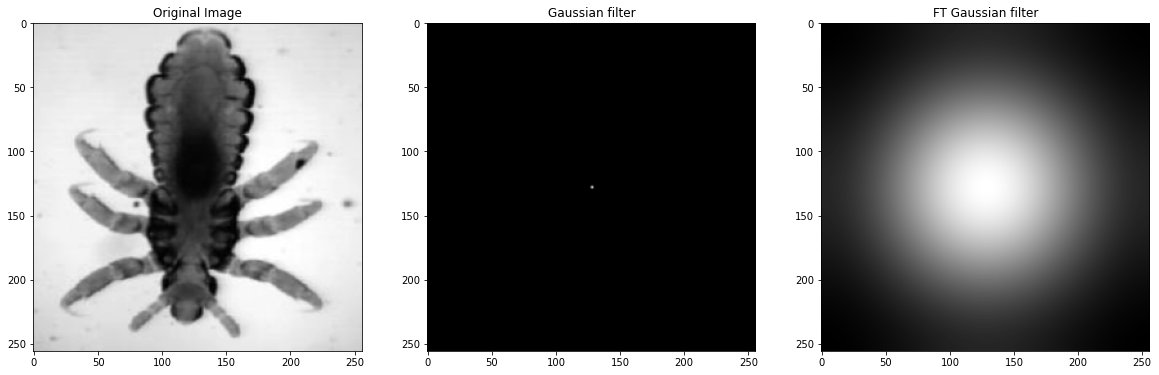

In [52]:
fig, axarr = plt.subplots(1,3, figsize = (20,10))
axarr[0].imshow(img, cmap = 'gray')
axarr[0].set_title("Original Image")
axarr[1].imshow(gaus_img, cmap = 'gray')
axarr[1].set_title("Gaussian filter")
axarr[2].imshow(ft_img(gaus_img), cmap = 'gray')
axarr[2].set_title("FT Gaussian filter")

In [67]:
fft_img = np.fft.fft2(img)
fft_gaus_img = np.fft.fft2(gaus_img)
filtered_ft_gaus_img = np.multiply(fft_gaus_img, fft_img)
lowpass_gaus_img = np.abs(np.fft.ifft2(filtered_ft_gaus_img))

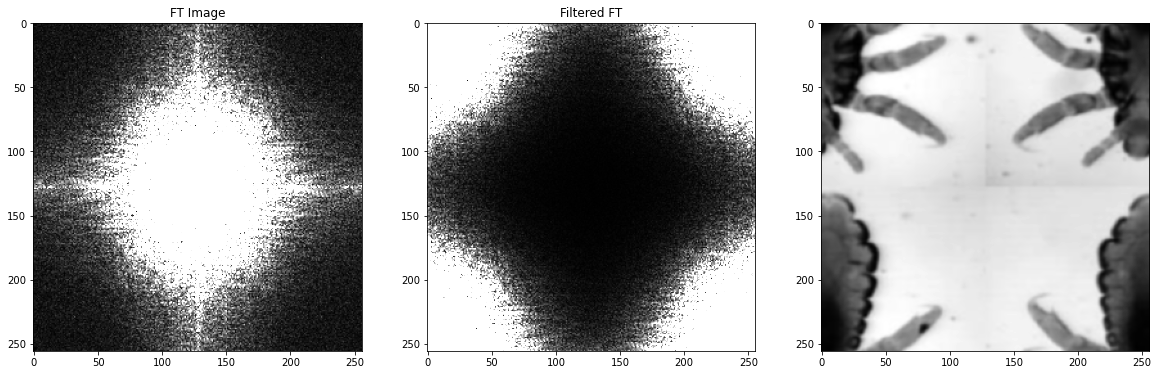

In [68]:
fig, axarr = plt.subplots(1,3, figsize = (20,10))
axarr[0].imshow(ft_img(img), cmap = 'gray', vmax=1000)
axarr[0].set_title("FT Image")
axarr[1].imshow(np.abs(filtered_ft_gaus_img), cmap = 'gray', vmax=1000)
axarr[1].set_title("Filtered FT")
axarr[2].imshow(lowpass_gaus_img, cmap='gray')